In [2]:
from colorthief import ColorThief
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.image as mpimg
import cv2 as cv
from skimage.color import deltaE_ciede2000
import json
from tqdm import tqdm


Overlay image saved to: output_2_palate.png


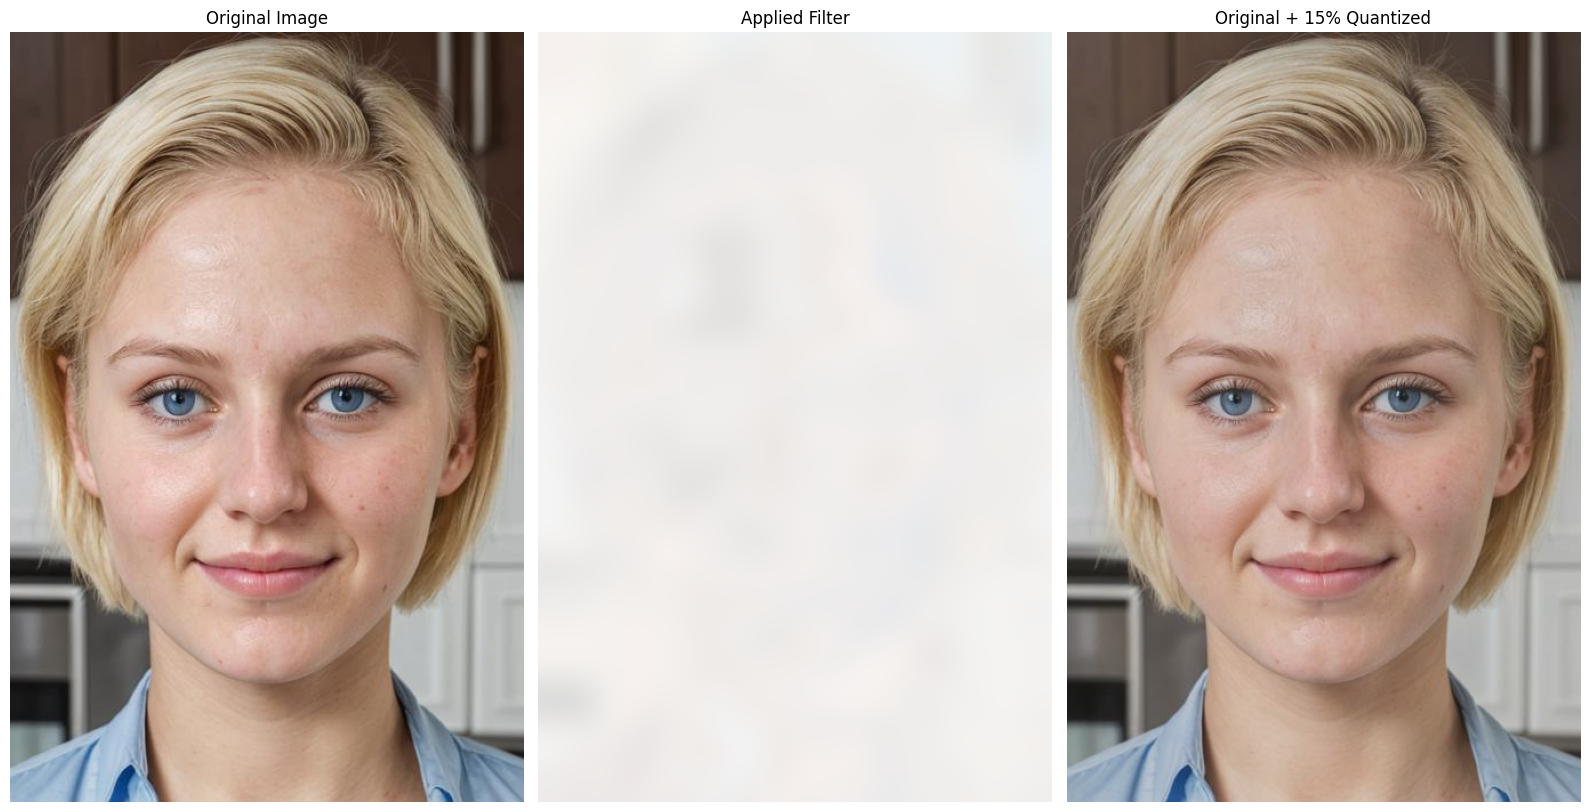

In [ ]:
# Editor: extract color palette and quantize image
def get_quantized_image(image_path, palette_size=5, dither=True, transparency=0.5, blur_radius=5, output_path=None):
    color_thief = ColorThief(image_path)
    palette = color_thief.get_palette(color_count=palette_size)
    
    pil_palette = []
    for color in palette:
        pil_palette.extend(color)
    pil_palette += [0] * (768 - len(pil_palette))
    
    original = Image.open(image_path).convert("RGBA")
    
    quantized_rgb = original.convert("RGB")
    quantized_p = quantized_rgb.quantize(
        colors=palette_size,
        dither=Image.Dither.FLOYDSTEINBERG if dither else Image.Dither.NONE
    )
    
    quantized_p.putpalette(pil_palette)
    
    quantized_rgba = quantized_p.convert("RGBA")
    blurred_quantized = quantized_rgba.filter(ImageFilter.GaussianBlur(radius=blur_radius))
    
    alpha = int(255 * transparency)
    transparent_data = []
    for r, g, b, a in blurred_quantized.getdata():
        transparent_data.append((r, g, b, alpha))
    blurred_quantized.putdata(transparent_data)
    
    combined = Image.alpha_composite(original, blurred_quantized)
    
    if output_path:
        combined.save(output_path)
        print(f"Overlay image saved to: {output_path}")
    
    return combined, palette, blurred_quantized

def display_results(original, combined, palette, filter):
    plt.figure(figsize=(16, 9))
      
    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(original)
    plt.title("Original Image")
    plt.axis('off')
    
    # Overlay image
    plt.subplot(1, 3, 2)
    plt.imshow(filter)
    plt.title(f"Applied Filter")
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(combined)
    plt.title(f"Original + {int(transparency*100)}% Quantized")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

    # Color palette
    # plt.subplot(2, 1, 2)
    for i, color in enumerate(palette):
        plt.subplot(1, len(palette), i+1)
        plt.imshow([[color]])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

image_path = '1.jpeg'
output_path = 'output_2_palate.png'

transparency = 0.15 # filter degree
blur = 13 # colors blending
combined, palette, filter = get_quantized_image(
    image_path,
    palette_size=30,
    dither=True,
    transparency=transparency,
    blur_radius=blur,
    output_path=output_path
)

original = Image.open(image_path).convert("RGBA")
display_results(original, combined, palette, filter)
